# Pendulul Dublu

Simularea Miscarii pendulului dublu utilizand Runge Kutta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
#consideram cazul in care m1=m2 si l1=l2
m1 = 1   #Masa primului corp 1
m2 = 1    #Masa celui de-al doilea corp  
g = 10 #Acceleratia gravitationala
l1 = 1  #lungimea primei tije 
l2 = 1   #Lungimea celei de-a doua tije
x = y = []

In continuare o sa definim functiile necesare in realizarea graficului miscarii

In [3]:
def angular_acc1(a1_arr,a2_arr):
    """Calculeaza acceleratia unghiulara pentru primului pendul
          Inputs-> a1_arr: np.array([Unghiul initial, viteza unghiulara initiala]);
                 a2_arr: np.array([Unghiul initial, viteza unghiulara initiala]);"""
    num = -g *(2*m1+m2)*np.sin(a1_arr[0]) - m2*g*np.sin(a1_arr[0]-2*a2_arr[0])- 2* m2*np.sin(a1_arr[0]-a2_arr[0]) * (l2*pow(a2_arr[1],2)+l1*pow(a1_arr[1],2)*np.cos(a1_arr[0]-a2_arr[0]))
    den = l1*(2*m1+m2-m2 * np.cos(2*a1_arr[0]-2*a2_arr[0]))
    return num/den


In [4]:
def angular_acc2(a1_arr,a2_arr):
    """Calculeaza acceleratia unghiulara pentru al doilea pendul
        Inputs-> a1_arr: np.array([Unghiul initial, viteza unghiulara initiala]);
                 a2_arr: np.array([Unghiul initial, viteza unghiulara initiala]);"""
    temp = (2*np.sin(a1_arr[0]-a2_arr[0])) 
    num = temp * (l1*pow(a1_arr[1],2)*(m1+m2)+g*(m1+m2)*np.cos(a1_arr[0])+l2*pow(a2_arr[1],2)*m2*np.cos(a1_arr[0]-a2_arr[0]))
    den = l2*(2*m1+m2-m2 * np.cos(2*a1_arr[0]-2*a2_arr[0]))
    return num/den

In [5]:
def deriv_a1(a1_arr,a2_arr,t):
    """
    Returneaza o matrice np.array([prima derivata, a doua derivata])
    Inputs-> a1_arr: np.array([Unghiul initial, viteza unghiulara initiala]);
                 a2_arr: np.array([Unghiul initial, viteza unghiulara initiala]);
             t: variabila dependenta;
    """
    return np.array([a1_arr[1],angular_acc1(a1_arr,a2_arr)])

In [6]:
def deriv_a2(a2_arr,a1_arr,t):
    return np.array([a2_arr[1],angular_acc2(a1_arr,a2_arr)])


In [7]:

def rk4(deriv,func_i,func_i2, x_i,h):
    """
    Implementam metoda RK4
    Inputs-> deriv: o functie care ia 2 argumente;
             func_i: functia care trebuie sa fie determinata;
             func_i2: aceasta reprezinta un argument al functiei  func_i (deriv_a1 and deriv_a2);
             x_i: variabila dependenta de func_i;
             h: dimensiunea pasului pe care il facem;
             
    """
    k1 = deriv(func_i,func_i2,x_i)
    k2 = deriv(func_i+h/2,func_i2,h*k1/2)
    k3 = deriv(func_i+h/2,func_i2,h*k2/2)
    k4 = deriv(func_i+h,func_i2,h*k3)
    func = func_i + (1/6) * h * (k1 +2*k2+2*k3+k4)
    x = x_i + h
    return (x,func)

In [8]:
#Conditiile initiale ([unghiul initial, viteza unghiulara initiala])
a1_arr = np.array([np.pi/2,0])
a2_arr = np.array([np.pi/2,1])
t = 0 # timpul de start
h = 0.001 # marimea pasului pentru metoda RK4
steps_no = 1000 # numarul maxim de pasi pentru metoda RK4
time_arr = np.array([t])
func_array1 = np.array([a1_arr])
func_array2 = np.array([a2_arr])

In [9]:
for i in range(steps_no):
    temp =a1_arr
    (t,a1_arr) = rk4(deriv_a1,a1_arr,a2_arr,t,h)
    t -=h 
    (t,a2_arr) = rk4(deriv_a2,a2_arr,temp,t,h)
    time_arr2 = np.append(time_arr, t)
    func_array1 = np.vstack((func_array1,np.array([a1_arr])))
    func_array2 = np.vstack((func_array2,np.array([a2_arr])))

In [10]:
[pendulum1_theta, pendulum1_angular_speed] = func_array1.transpose()
[pendulum2_theta, pendulum2_angular_speed] = func_array2.transpose()

pendulum1_x = l1*np.sin(pendulum1_theta)
pendulum1_y = - l1*np.cos(pendulum1_theta)

pendulum2_x = l2*np.sin(pendulum2_theta) + pendulum1_x
pendulum2_y = pendulum1_y - l2*np.cos(pendulum2_theta)

In [11]:
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text
def animate(i):
    x = [0, pendulum1_x[i], pendulum2_x[i]]
    y = [0, pendulum1_y[i], pendulum2_y[i]]
    
    line.set_data(x,y)
    return line, time_text

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


<Figure size 432x288 with 0 Axes>

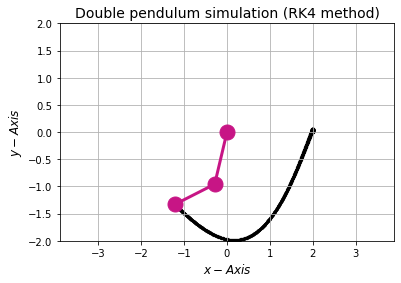

In [14]:

fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-3.9, 3.9), ylim=(-2, 2))
ax.set_xlabel('$x-Axis$',fontsize=12)
ax.set_ylabel('$y-Axis$',fontsize=12)
ax.set_title('Double pendulum simulation (RK4 method)',fontsize=14)
ax.grid()
 
line, = ax.plot([], [], 'o-',lw=3,color='mediumvioletred',markersize=15)
time_template = 'time = %0.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
 
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(pendulum1_y)),
                               interval=0, blit=True, init_func=init)
 
ax.scatter(pendulum2_x, pendulum2_y,s=5, color='black',alpha=0.5)
ani.save('double_pendulum_200.gif', fps=20, dpi =8)
plt.show()